# ESTI019 - QS2020 - CSM - Minami

# Lab3 - Codificação de Imagem por DCT e Animação

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import numpy
import cv2
import os

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
!ls -l "/content/drive/My Drive/2020_QS/Cod. Sinais Mult./CSaMigos/lab03"   # verifica se montou o drive e se os arquivos estão lá...

Mounted at /content/drive/
total 2623
drwx------ 2 root root    4096 Oct 18 22:15 Canais_YCrCb
drwx------ 2 root root    4096 Oct 18 22:15 compresssao_imagens
-rw------- 1 root root  114207 Oct 18 22:15 Lab3+-+Cod+Imagem+por+DCT+e+Animacao+-+Colaboratory.pdf
-rw------- 1 root root 2554509 Oct 18 22:15 Lab3_Cod_Imagem_por_DCT_e_Animacao.ipynb
drwx------ 2 root root    4096 Oct 18 22:15 RGB_Camada
drwx------ 2 root root    4096 Oct 18 22:15 RGB_YCrCb_HSV


In [ ]:
integrantes = ['beatriz', 'daniel', 'felipe', 'leonardo', 'rodrigo']    
length = len(integrantes) 
for i in range(length): 
    print(integrantes[i]) 

beatriz
daniel
felipe
leonardo
rodrigo


In [ ]:
mypath='/content/drive/My Drive/2020_QS/Cod. Sinais Mult./CSaMigos/fotos/'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
print(onlyfiles)

['felipe.jpg', 'group_photo.jpeg', 'rodrigo.jpeg', 'leonardo.jpg', 'daniel.jpeg', 'beatriz.jpeg']


In [ ]:
#GROUP PHOTO
bgr1 = cv.imread('/content/drive/My Drive/2020_QS/Cod. Sinais Mult./CSaMigos/fotos/group_photo.jpeg') # leitura no formato BGR!
altura, largura, camadas = bgr1.shape

print("Resolução: ", largura, " x ", altura, "PIXELS. ", camadas, " camadas.")

Resolução:  1280  x  1280 PIXELS.  3  camadas.


Separa os canais e re-arranja para formar imagem RGB

In [ ]:
b1, g1, r1 = cv.split(bgr1)
rgb2 = cv.merge([r1,g1,b1])
# Q1 - O que foi feito aqui?

Imprime cores trocadas (BGR) e reais (RGB) 

Text(0.5, 1.0, 'RBG')

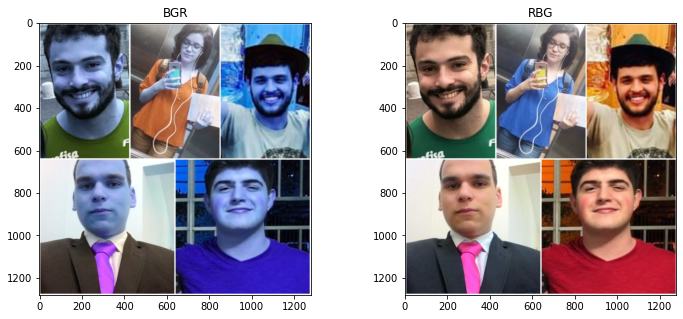

In [ ]:
plt.figure(figsize=[12, 5])
plt.subplot(121); plt.imshow(bgr1); plt.title('BGR')
plt.subplot(122); plt.imshow(rgb2); plt.title('RBG')

Converte para os formatos YCrCb e HSV

Text(0.5, 1.0, 'HSV')

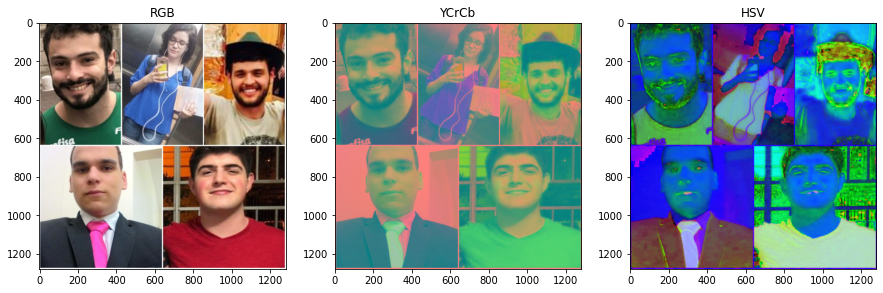

In [ ]:
ycrcb = cv.cvtColor(bgr1, cv.COLOR_BGR2YCrCb)
hsv = cv.cvtColor(bgr1, cv.COLOR_BGR2HSV)
plt.figure(figsize=[15,6])
plt.subplot(131); plt.imshow(rgb2); plt.title('RGB')
plt.subplot(132); plt.imshow(ycrcb); plt.title('YCrCb')
plt.subplot(133); plt.imshow(hsv); plt.title('HSV')

Separação das Camadas RGB individualmente

Text(0.5, 1.0, 'RGB_Camada B')

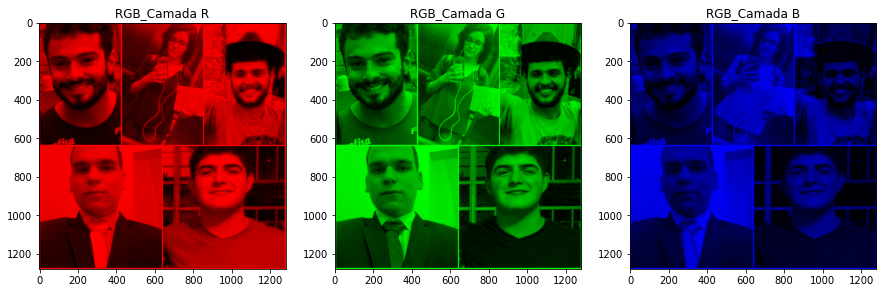

In [ ]:
imageR = rgb2.copy()
imageR[:, :, 1:3] = 0
imageG = rgb2.copy()
imageG[:, :, 0] = 0; imageG[:, :, 2] = 0
imageB = rgb2.copy()
imageB[:, :, 0:2] = 0     
# Q2 - O que foi feito aqui?

plt.figure(figsize=[15,6])
plt.subplot(131); plt.imshow(imageR); plt.title('RGB_Camada R')
plt.subplot(132); plt.imshow(imageG); plt.title('RGB_Camada G')
plt.subplot(133); plt.imshow(imageB); plt.title('RGB_Camada B')

Separação dos Canais YCbCr

Text(0.5, 1.0, 'YCrCb_Cb')

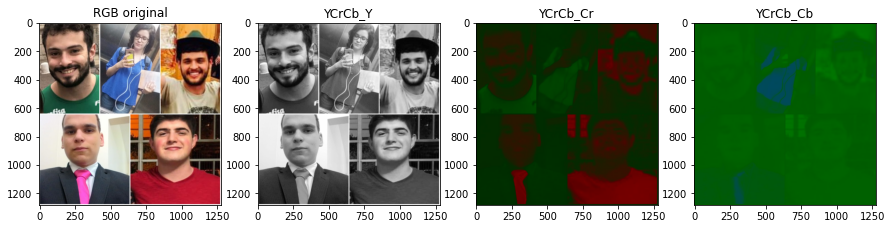

In [ ]:
y1, cr1, cb1 = cv.split(ycrcb)
imageCR = ycrcb.copy()
imageCR[:, :, 0] = 0
imageCR[:, :, 2] = 0
Cr = cv.cvtColor(imageCR, cv.COLOR_YCrCb2RGB)

imageCB = ycrcb.copy()
imageCB[:, :, 0] = 0
imageCB[:, :, 1] = 0
Cb = cv.cvtColor(imageCB, cv.COLOR_YCrCb2RGB)

plt.figure(figsize=[15, 5])
plt.subplot(141); plt.imshow(rgb2); plt.title('RGB original')
plt.subplot(142); plt.imshow(y1, cmap='gray'); plt.title('YCrCb_Y')
plt.subplot(143); plt.imshow(Cr); plt.title('YCrCb_Cr')
plt.subplot(144); plt.imshow(Cb); plt.title('YCrCb_Cb')


In [ ]:
#ALL PHOTOS
for n in range(0, len(onlyfiles)):
  integrante_title = onlyfiles[n].split('.')[0]
  bgr1_n = cv.imread(join(mypath,onlyfiles[n])) # leitura no formato BGR!
  altura_n, largura_n, camadas_n = bgr1_n.shape
  print("Resolução para ", integrante_title, ": ", largura_n, " x ", altura_n, "PIXELS. ", camadas_n, " camadas.")

  #Separa os canais e re-arranja para formar imagem RGB
  b1_n, g1_n, r1_n = cv.split(bgr1_n)
  rgb2_n = cv.merge([r1_n,g1_n,b1_n])
  
  #Imprime cores trocadas (BGR) e reais (RGB)
  plt.figure(figsize=[12, 5])
  plt.subplot(121); plt.imshow(bgr1_n); plt.title(integrante_title + ' ' + 'BGR')
  plt.subplot(122); plt.imshow(rgb2_n); plt.title(integrante_title + ' ' + 'RBG')
  #plt.savefig('/content/drive/My Drive/2020_QS/Cod. Sinais Mult./CSaMigos/lab03/rgb/rgb_' + integrante_title + '.jpg')
  
  #Converte para os formatos YCrCb e HSV
  # Plota em RBG, YCrCb e HSV
  ycrcb_n = cv.cvtColor(bgr1_n, cv.COLOR_BGR2YCrCb)
  hsv_n = cv.cvtColor(bgr1_n, cv.COLOR_BGR2HSV)
  plt.figure(figsize=[15,6])
  plt.subplot(131); plt.imshow(rgb2_n); plt.title(integrante_title + ' ' + 'RGB')
  plt.subplot(132); plt.imshow(ycrcb_n); plt.title(integrante_title + ' ' + 'YCrCb')
  plt.subplot(133); plt.imshow(hsv_n); plt.title(integrante_title + ' ' + 'HSV')
  plt.savefig('/content/drive/My Drive/2020_QS/Cod. Sinais Mult./CSaMigos/lab03/RGB_YCrCb_HSV/RGB_YCrCb_HSV_' + integrante_title + '.jpg')

  #Separação das Camadas RGB individualmente
  imageR_n = rgb2_n.copy()
  imageR_n[:, :, 1:3] = 0
  imageG_n = rgb2_n.copy()
  imageG_n[:, :, 0] = 0; imageG[:, :, 2] = 0
  imageB_n = rgb2_n.copy()
  imageB_n[:, :, 0:2] = 0     
  # Q2 - O que foi feito aqui?

  plt.figure(figsize=[15,6])
  plt.subplot(131); plt.imshow(imageR_n); plt.title(integrante_title + ' ' + 'RGB_Camada R')
  plt.subplot(132); plt.imshow(imageG_n); plt.title(integrante_title + ' ' + 'RGB_Camada G')
  plt.subplot(133); plt.imshow(imageB_n); plt.title(integrante_title + ' ' + 'RGB_Camada B')
  plt.savefig('/content/drive/My Drive/2020_QS/Cod. Sinais Mult./CSaMigos/lab03/RGB_Camada/RGB_Camadas_' + integrante_title + '.jpg')

  #Separação dos Canais YCbCr
  y1_n, cr1_n, cb1_n = cv.split(ycrcb_n)
  imageCR_n = ycrcb_n.copy()
  imageCR_n[:, :, 0] = 0
  imageCR_n[:, :, 2] = 0
  Cr_n = cv.cvtColor(imageCR_n, cv.COLOR_YCrCb2RGB)

  imageCB_n = ycrcb_n.copy()
  imageCB_n[:, :, 0] = 0
  imageCB_n[:, :, 1] = 0
  Cb_n = cv.cvtColor(imageCB_n, cv.COLOR_YCrCb2RGB)

  plt.figure(figsize=[15, 5])
  plt.subplot(141); plt.imshow(rgb2_n); plt.title(integrante_title + ' ' + 'RGB original')
  plt.subplot(142); plt.imshow(y1_n, cmap='gray'); plt.title(integrante_title + ' ' + 'YCrCb_Y')
  plt.subplot(143); plt.imshow(Cr_n); plt.title(integrante_title + ' ' + 'YCrCb_Cr')
  plt.subplot(144); plt.imshow(Cb_n); plt.title(integrante_title + ' ' + 'YCrCb_Cb')
  plt.savefig('/content/drive/My Drive/2020_QS/Cod. Sinais Mult./CSaMigos/lab03/Canais_YCrCb/Canais_YCrCb_' + integrante_title + '.jpg')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
paths = ['/content/drive/My Drive/2020_QS/Cod. Sinais Mult./CSaMigos/lab03/bgr/', 
         '/content/drive/My Drive/2020_QS/Cod. Sinais Mult./CSaMigos/lab03/rgb/', 
         '/content/drive/My Drive/2020_QS/Cod. Sinais Mult./CSaMigos/lab03/YCrCb/', 
         '/content/drive/My Drive/2020_QS/Cod. Sinais Mult./CSaMigos/lab03/HSV/', 
         '/content/drive/My Drive/2020_QS/Cod. Sinais Mult./CSaMigos/lab03/RGB_Camada/', 
         '/content/drive/My Drive/2020_QS/Cod. Sinais Mult./CSaMigos/lab03/Canais_YCrCb/']    
length = len(paths) 
for i in range(length): 
    print(paths[i]) 
    # Get all files.
    list = os.listdir(paths[i])

    # Loop and add files to list.
    pairs = []
    for file in list:

        # Use join to get full file path.
        location = os.path.join(paths[i], file)

        # Get size and add to list of tuples.
        size = os.path.getsize(location)
        pairs.append((size, file))

    # Sort list of tuples by the first element, size.
    pairs.sort(key=lambda s: s[0])

    # Display pairs.
    for pair in pairs:
        print(pair)

/content/drive/My Drive/2020_QS/Cod. Sinais Mult./CSaMigos/lab03/bgr/


FileNotFoundError: ignored

# Com as Imagens do Grupo:


1.   Faça o mesmo com uma imagem de cada integrante do grupo e
2.   Com a foto montagem de todos os do grupo, lembrando das roupas com cores diferentes, preferencialmente (R, G e B).



1. ok
2. ok

********************************************************************************

*COMPRESSÃO DE IMAGENS COM PERDAS*

================================================================================


*   O formato JPEG permite compressão da imagem ao salvá-la num arquivo com o comando imwrite().

*   A compressão afeta a qualidade da imagem, sendo controlada pelo parâmetro IMWRITE_JPEG_QUALITY entre 0-100, sendo que quanto maior, melhor a qualidade. O default é 95.




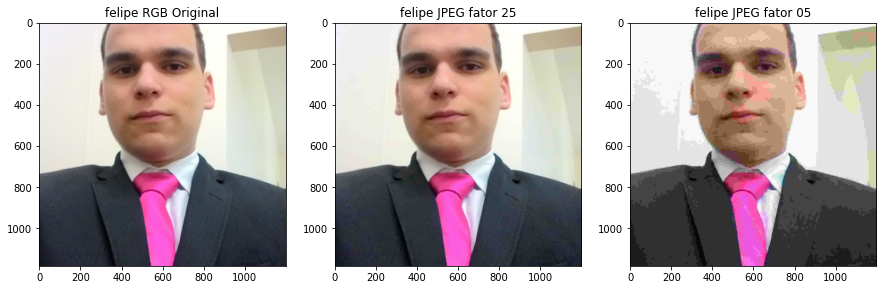

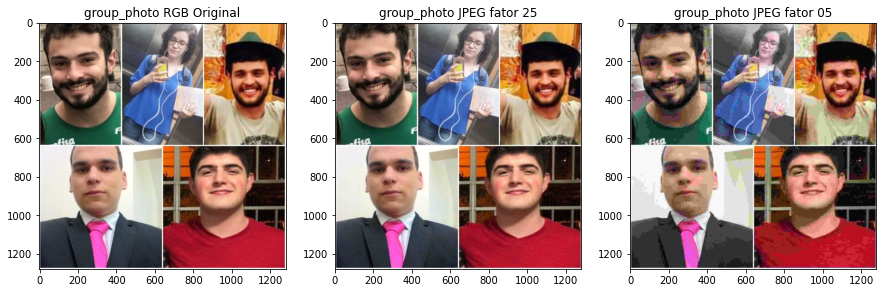

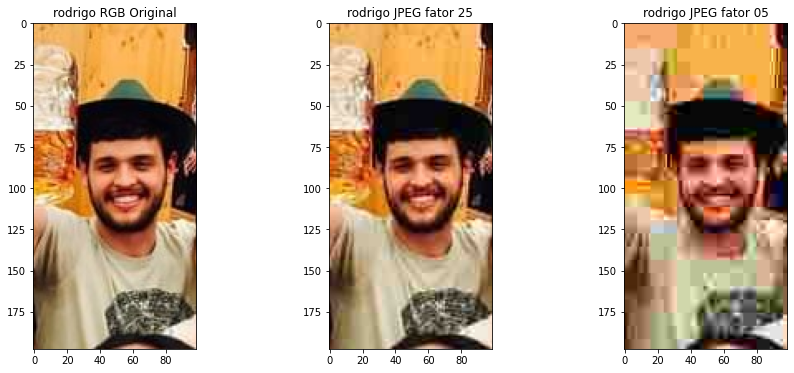

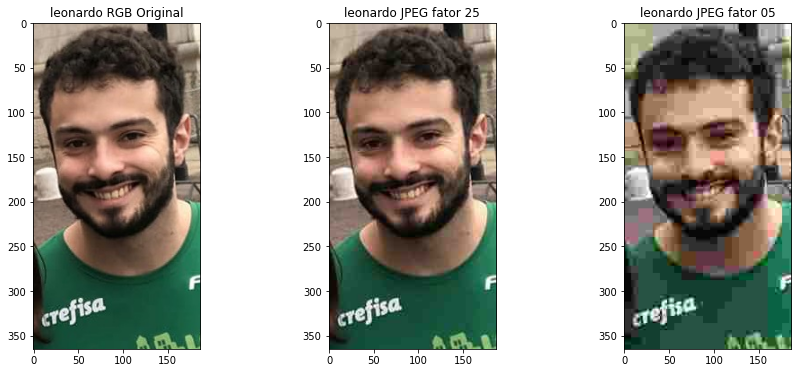

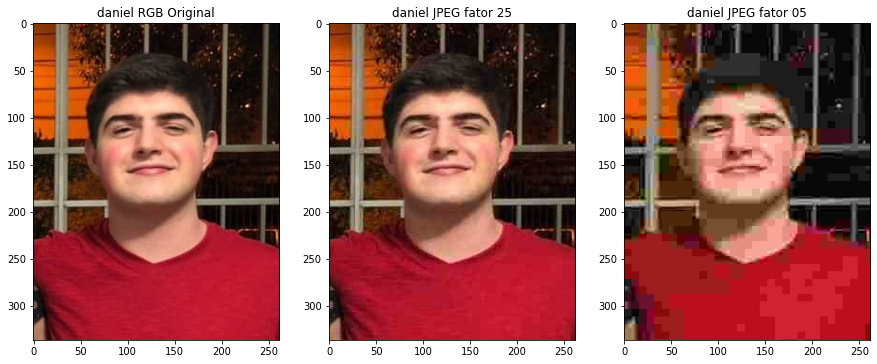

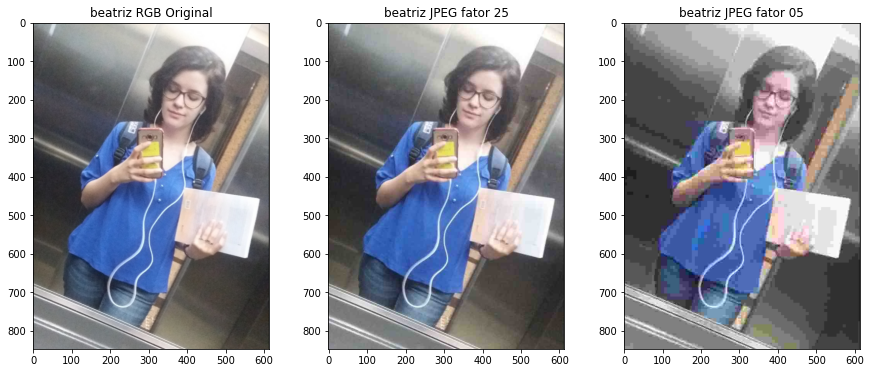

In [ ]:
for n in range(0, len(onlyfiles)):
  integrante_title = onlyfiles[n].split('.')[0]
  bgr1_n = cv.imread(join(mypath,onlyfiles[n])) # leitura no formato BGR!
  #altura_n, largura_n, camadas_n = bgr1_n.shape
  #print("BGR: Resolução para ", onlyfiles[n], ": ", largura_n, " x ", altura_n, "PIXELS. ", camadas_n, " camadas.")
  bgr_n = cv.imread(join(mypath,onlyfiles[n]))  # formato BGR

  # salva com menor qualidade, fatores 25 e 5
  filename_fator_25 = '25_'+onlyfiles[n]
  filename_fator_05 = '05_'+onlyfiles[n]
  
  cv.imwrite(filename_fator_25, bgr_n, [cv.IMWRITE_JPEG_QUALITY, 25])
  cv.imwrite(filename_fator_05, bgr_n, [cv.IMWRITE_JPEG_QUALITY, 5])

  # leitura para visualização e conversão para acertar a cor
  rgb_n = cv.cvtColor(bgr_n, cv.COLOR_BGR2RGB)
  bgr25_n = cv.imread(filename_fator_25); rgb25_n = cv.cvtColor(bgr25_n, cv.COLOR_BGR2RGB)
  bgr05_n = cv.imread(filename_fator_05); rgb05_n = cv.cvtColor(bgr05_n, cv.COLOR_BGR2RGB)

  plt.figure(figsize=[15,6])
  plt.subplot(131); plt.imshow(rgb_n); plt.title(integrante_title + ' ' + 'RGB Original')
  plt.subplot(132); plt.imshow(rgb25_n); plt.title(integrante_title + ' JPEG fator 25')
  plt.subplot(133); plt.imshow(rgb05_n); plt.title(integrante_title + ' JPEG fator 05')
  plt.savefig('/content/drive/My Drive/2020_QS/Cod. Sinais Mult./CSaMigos/lab03/compresssao_imagens/compresssao_imagens_' + integrante_title + '.jpg')

# COM AS FOTOS DO GRUPO


1.   Repita o procedimento para cada uma das fotos dos integrantes do grupo e para a foto-montagem do grupo todo
2.   Leia o tamanho dos arquivos (em bytes) e faça uma tabela comparando os tamanhos originais e os comprimidos e calcule a porcentagem de compressão de cada arquivo destes tamanhos na tabela construída



1. ok
2. fazer

********************************************************************************
# TRANSFORMADA DISCRETA COSSENO
********************************************************************************

Nesta parte calcule a DCT em bloco de 8x8 da imagem, referente à bola

In [ ]:
img = cv.imread('/content/drive/My Drive/2020_QS/Cod. Sinais Mult./CSaMigos/fotos/group_photo.jpeg')
alt, larg, cam = img.shape

ycbcr = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
y, cr, cb = cv.split(ycrcb)

bola = y[280:340, 330:390]
h, w = bola.shape

cx = round(w/2)
cy = round(h/2)

# Escolhendo um pedaço da imagem "BOLA"
bloco8x8 = bola[cx-4:cx+4, cy-4:cy+4]
print("(1)"); print("Matriz 8x8: componente Y original")
print(bloco8x8)

bloco8x8f = np.float32(bloco8x8)/255.0  # conversão para float
dct8x8f = cv.dct(bloco8x8f)   # calcula a DCT
dct8x8 = np.int64( (dct8x8f*255.0)) # coversão para inteiro

print("(2)"); print("Imagem Y 8x8 (formato ponto flutuante)")
print( np.around(bloco8x8f, decimals = 2) )

print("(3)"); print("DCT de Y (ponto flutuante)")
print( np.around(dct8x8f, decimals = 2) )

print("(4)"); print("DCT de Y (formato inteiro)")
print(dct8x8)



(1)
Matriz 8x8: componente Y original
[[101 130 135 109  64  43  22  17]
 [ 90 121 131 109  71  52  32  27]
 [ 84 118 133 115  88  70  52  46]
 [ 85 122 142 127 110  94  77  71]
 [ 91 131 154 142 127 112  96  91]
 [ 97 138 162 152 135 120 105  99]
 [111 150 173 170 152 127 103  97]
 [115 153 174 170 144 117  90  81]]
(2)
Imagem Y 8x8 (formato ponto flutuante)
[[0.4  0.51 0.53 0.43 0.25 0.17 0.09 0.07]
 [0.35 0.47 0.51 0.43 0.28 0.2  0.13 0.11]
 [0.33 0.46 0.52 0.45 0.35 0.27 0.2  0.18]
 [0.33 0.48 0.56 0.5  0.43 0.37 0.3  0.28]
 [0.36 0.51 0.6  0.56 0.5  0.44 0.38 0.36]
 [0.38 0.54 0.64 0.6  0.53 0.47 0.41 0.39]
 [0.44 0.59 0.68 0.67 0.6  0.5  0.4  0.38]
 [0.45 0.6  0.68 0.67 0.56 0.46 0.35 0.32]]
(3)
DCT de Y (ponto flutuante)
[[ 3.37  0.65 -0.52 -0.32 -0.14 -0.06  0.01 -0.02]
 [-0.68  0.24  0.12 -0.02 -0.02  0.01  0.01 -0.01]
 [-0.07  0.23 -0.01 -0.01  0.02  0.01 -0.   -0.02]
 [ 0.07 -0.02  0.02 -0.01 -0.01  0.    0.   -0.  ]
 [ 0.    0.03 -0.    0.   -0.   -0.    0.   -0.  ]
 [ 0.04

ZERANDO manualmente da diagonal da DCT as componentes AC

In [ ]:
dct8x8fz = dct8x8f.copy()
dct8x8fz[0,7] = 0
dct8x8fz[1,6:8] = 0
dct8x8fz[2,5:8] = 0
dct8x8fz[3,4:8] = 0
dct8x8fz[4,3:8] = 0
dct8x8fz[5,2:8] = 0
dct8x8fz[6,1:8] = 0
dct8x8fz[7,0:8] = 0
print( np.around(dct8x8fz, decimals = 2))


[[ 3.37  0.65 -0.52 -0.32 -0.14 -0.06  0.01  0.  ]
 [-0.68  0.24  0.12 -0.02 -0.02  0.01  0.    0.  ]
 [-0.07  0.23 -0.01 -0.01  0.02  0.    0.    0.  ]
 [ 0.07 -0.02  0.02 -0.01  0.    0.    0.    0.  ]
 [ 0.    0.03 -0.    0.    0.    0.    0.    0.  ]
 [ 0.04 -0.01  0.    0.    0.    0.    0.    0.  ]
 [-0.03  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]]


Bloco Original e Reconstruído com Zeros das componentes AC da diagonal para baixo zerados

Text(0.5, 1.0, 'Bloco Reconstruído com Zeros')

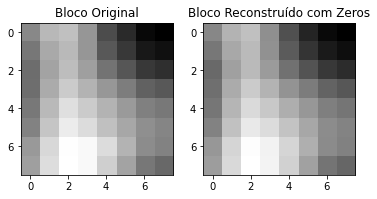

In [ ]:
bloco8x8recz = cv.idct(dct8x8fz)

plt.subplot(121); plt.imshow(bloco8x8,'gray'); plt.title('Bloco Original')
plt.subplot(122); plt.imshow(bloco8x8recz,'gray'); plt.title('Bloco Reconstruído com Zeros')


# Escolha outro bloco de 8x8 da imagem e:
 

1.   refaça este procedimento zerando mais DUAS DIAGONAIS ACIMA DA PRINCIPAL além destas
2.   Compare e comente as imagens do bloco original e reconstruída


In [ ]:
img = cv.imread('/content/drive/My Drive/2020_QS/Cod. Sinais Mult./CSaMigos/fotos/group_photo.jpeg')
alt, larg, cam = img.shape

ycbcr = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
y, cr, cb = cv.split(ycrcb)

bola = y[280:340, 330:390]
h, w = bola.shape

cx = round(w/2)
cy = round(h/2)

# Escolhendo um pedaço da imagem "BOLA"
bloco8x8 = bola[cx+5:cx+13, cy+5:cy+13]
print("(1)"); print("Matriz 8x8: componente Y original")
print(bloco8x8)

bloco8x8f = np.float32(bloco8x8)/255.0  # conversão para float
dct8x8f = cv.dct(bloco8x8f)   # calcula a DCT
dct8x8 = np.int64( (dct8x8f*255.0)) # coversão para inteiro

print("(2)"); print("Imagem Y 8x8 (formato ponto flutuante)")
print( np.around(bloco8x8f, decimals = 2) )

print("(3)"); print("DCT de Y (ponto flutuante)")
print( np.around(dct8x8f, decimals = 2) )

print("(4)"); print("DCT de Y (formato inteiro)")
print(dct8x8)

(1)
Matriz 8x8: componente Y original
[[ 43  44  47  53  56  59  63  66]
 [ 40  42  47  55  58  63  68  72]
 [ 51  55  60  67  70  76  82  86]
 [ 72  77  82  88  92  98 104 108]
 [ 89  95 101 107 111 117 123 128]
 [114 118 121 130 132 137 140 143]
 [126 130 133 139 141 145 148 150]
 [140 142 144 149 150 152 154 155]]
(2)
Imagem Y 8x8 (formato ponto flutuante)
[[0.17 0.17 0.18 0.21 0.22 0.23 0.25 0.26]
 [0.16 0.16 0.18 0.22 0.23 0.25 0.27 0.28]
 [0.2  0.22 0.24 0.26 0.27 0.3  0.32 0.34]
 [0.28 0.3  0.32 0.35 0.36 0.38 0.41 0.42]
 [0.35 0.37 0.4  0.42 0.44 0.46 0.48 0.5 ]
 [0.45 0.46 0.47 0.51 0.52 0.54 0.55 0.56]
 [0.49 0.51 0.52 0.55 0.55 0.57 0.58 0.59]
 [0.55 0.56 0.56 0.58 0.59 0.6  0.6  0.61]]
(3)
DCT de Y (ponto flutuante)
[[ 3.11 -0.31 -0.01 -0.03  0.01  0.   -0.01 -0.01]
 [-1.11 -0.03  0.01 -0.    0.    0.    0.    0.  ]
 [ 0.01  0.06 -0.    0.01  0.01  0.   -0.    0.  ]
 [ 0.04 -0.   -0.    0.    0.   -0.   -0.   -0.  ]
 [ 0.03  0.01  0.   -0.   -0.   -0.    0.    0.  ]
 [ 0.01

ZERANDO manualmente da diagonal da DCT, as componentes AC e mais duas diagonais acima da principal

In [ ]:
dct8x8fz = dct8x8f.copy()
dct8x8fz[0,5:8] = 0
dct8x8fz[1,4:8] = 0
dct8x8fz[2,3:8] = 0
dct8x8fz[3,2:8] = 0
dct8x8fz[4,1:8] = 0
dct8x8fz[5,0:8] = 0
dct8x8fz[6,0:8] = 0
dct8x8fz[7,0:8] = 0
print( np.around(dct8x8fz, decimals = 2))

[[ 3.11 -0.31 -0.01 -0.03  0.01  0.    0.    0.  ]
 [-1.11 -0.03  0.01 -0.    0.    0.    0.    0.  ]
 [ 0.01  0.06 -0.    0.    0.    0.    0.    0.  ]
 [ 0.04 -0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.03  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]]


Bloco Original e Reconstruído com Zeros das componentes AC da diagonal para baixo zerados, além de duas diagonais acima da principal também zeradas

Text(0.5, 1.0, 'Bloco Reconstruído com Zeros')

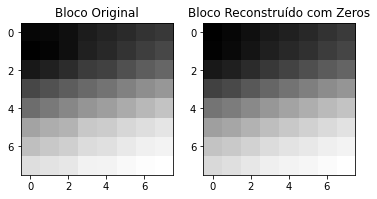

In [ ]:
bloco8x8recz = cv.idct(dct8x8fz)

plt.subplot(121); plt.imshow(bloco8x8,'gray'); plt.title('Bloco Original')
plt.subplot(122); plt.imshow(bloco8x8recz,'gray'); plt.title('Bloco Reconstruído com Zeros')

Comentários: Como é possível perceber, o bloco reconstruído se aproxima muito bem do bloco original, mesmo a DCT tendo duas diagonais a mais que foram zeradas em relação ao item anterior. Isso reforça a idea de que os menores indices da matriz são os mais importantes para a reconstrução da imagem.